In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
 df = pd.read_csv('data/card_transdata.csv')
   

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.isnull().head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [5]:
 df.isnull().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
 df.dtypes


distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [7]:
#convert float data types column to integer
df['repeat_retailer'] = (df['repeat_retailer']).astype(int)
df['used_chip'] = (df['used_chip']).astype(int)
df['used_pin_number'] = (df['used_pin_number']).astype(int)
df['online_order'] = (df['online_order']).astype(int)
df['fraud'] = (df['fraud']).astype(int)
df.dtypes


distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int32
used_chip                           int32
used_pin_number                     int32
online_order                        int32
fraud                               int32
dtype: object

In [8]:
 df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


0    912597
1     87403
Name: fraud, dtype: int64


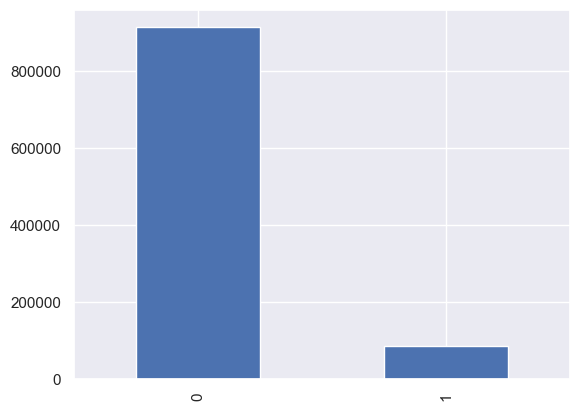

In [9]:
#Counting 1 and 0 Value in fraud column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["fraud"].map(lambda x: color_wheel.get(x + 1))
print(df.fraud.value_counts())
p=df.fraud.value_counts().plot(kind="bar")

<AxesSubplot: xlabel='fraud', ylabel='count'>

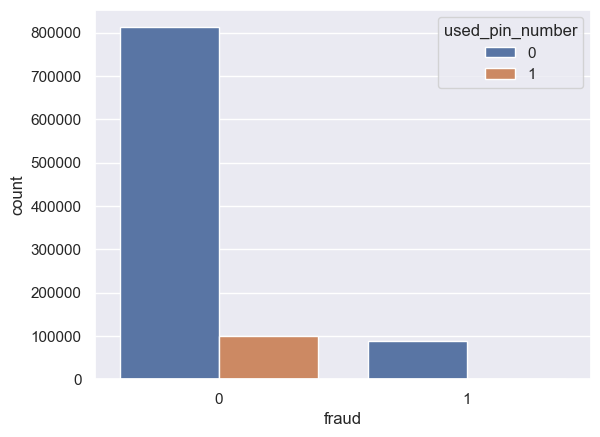

In [10]:
 sns.countplot(data=df, x="fraud", hue="used_pin_number")

<AxesSubplot: xlabel='fraud', ylabel='count'>

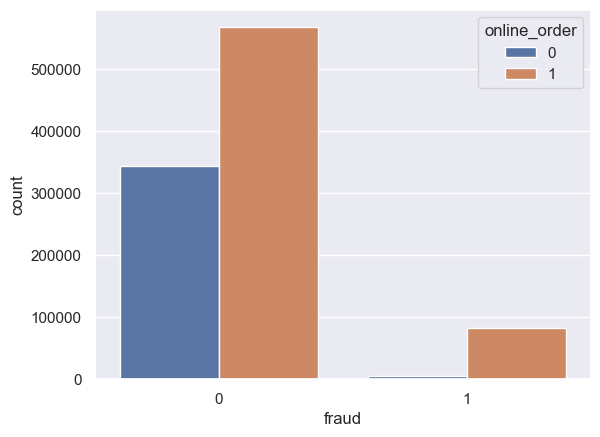

In [11]:
 sns.countplot(data=df, x="fraud", hue="online_order")


In [12]:
X = df.drop('fraud', axis=1)
y = df['fraud']


In [13]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)


In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 99.9985 %


In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = nb.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 95.1595 %


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [23]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 100.0 %


In [24]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

MLPClassifier()

In [25]:
y_pred = nn.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 99.7285 %


#Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = RandomForestClassifier()
lr.fit(X_train, y_train)


RandomForestClassifier()

In [27]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 100.0 %


# Visualize Logistic Regression and Random Forest


In [28]:
#importing classification report and confussion maatrix from sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest



Text(0.5, 1.0, 'Accuracy Score: 1.0')

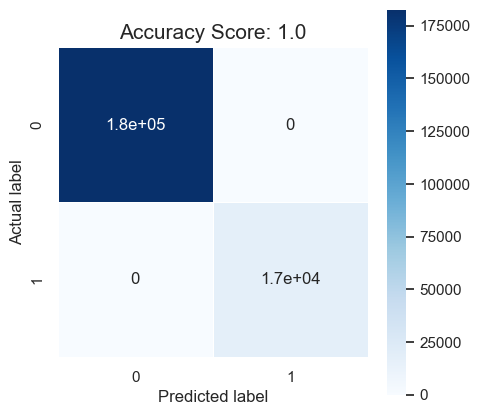

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba =rfc.predict_proba(X_test)[:][:,1]
#df_actual_predicted = 
pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.Data])
#df_actual_predicted.index = y_test.index
#fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
#auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
#plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
#plt.plot(fpr, fpr, linestyle = '--', color='k')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve', size = 15)
#plt.legend()

AttributeError: module 'pandas' has no attribute 'Data'

In [ ]:
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": rfc.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

# Logistic Regression

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.Data
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()


In [ ]:
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": lr.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)